In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gradient_descent(a:int,b:int,lr:int,X:np.array,Y:np.array,n,max_steps:int,cost_func,grad_decr):
    """
    a,b : coeffs. inputs a,b are the initial coeffs which are assumed
    lr : learning rate
    X,Y : x,y values of points
    n : number of points
    Ɛ ~= 0 (some small value close to 0)

    returns : a,b
    """
    costs = []
    Ɛ = 10**-6
    cost = 1000
    for step in range(max_steps):
        a_prev,b_prev,cost_prev = a,b,cost
        
        Y_pred = a*X - b
        decr_a,decr_b = grad_decr(n,Y,Y_pred,X)

        a = a_prev - lr*decr_a
        b = b_prev - lr*decr_b

        cost = cost_func(X,Y,n,a,b)
        costs.append(cost)
        print(cost)
        if (cost)**2 < Ɛ: #  (a_prev -a)**2 + (b_prev-b)**2 
            break
    
    plt.scatter([_ for _ in range(len(costs))],costs)
    plt.title("value of cost function over time")
    plt.show()

    return a,b

In [4]:
def mse(x:np.array,y:np.array,n:int,a:float,b:float):
    return (1/n)*np.sum((y-(a*x+b))**2)

In [5]:
def r_squared(x:np.array,y:np.array,n:int,a:float,b:float):
    y_mean = np.sum(y)/n
    rss = np.sum((y-(a*x+b))**2)
    tss = np.sum((y-y_mean)**2)

    return rss/tss

In [6]:
def grad_decr_least_squares(n,Y,Y_pred,X):
    return \
        (-2/n)*np.sum((Y-Y_pred)*X), \
        (2/n)*np.sum(Y-Y_pred)

In [7]:
def grad_decr_r_squared(n,Y,Y_pred,X):
    y_mean = np.sum(Y)/n
    tss = np.sum((Y-y_mean)**2)

    return \
        (-2/tss)*np.sum((Y-Y_pred)*X), \
        (2/tss)*np.sum(Y-Y_pred)

In [8]:
X = np.array([1,2,3,4,5])
Y = np.array([2,4,6,8,10])

In [9]:
a,b = 0,-1
lr = 0.05
n = len(X)
max_steps = 1000

3.26
7.677199999999999
6.444055999999998
6.39826832
6.1529492576
5.952221060671998
5.751681879330556
5.55904296953592
5.372650127182808
5.192544037873149
5.018468931229832
4.8502307280568075
4.68763229442723
4.530484826084577
4.378605538440789
4.231817830310428
4.089951010822685
3.9528401131282367
3.820325700376212
3.6922536807111004
3.5684751280188713
3.4488461087638385
3.3332275146160306
3.2214849006920776
3.113488329218521
3.0091122184360946
2.908235196569417
2.810739960692085
2.716513140323236
2.625445165596814
2.53743013985034
2.452365716485006
2.3701529799538514
2.290696330739738
2.213903374189234
2.139684813073264
2.0679543437495362
1.9986285558059629
1.9316268350684778
1.866871269860363
1.804286560404146
1.7437999312606693
1.6853410467035734
1.6288419289307285
1.5742368790175338
1.5214624005201776
1.4704571256400083
1.4211617438631567
1.3735189329924196
1.3274732924912538
1.2829712790623002
1.2399611443855814
1.1983928749439636
1.1582181338658706
1.1193902047176871
1.0818639371

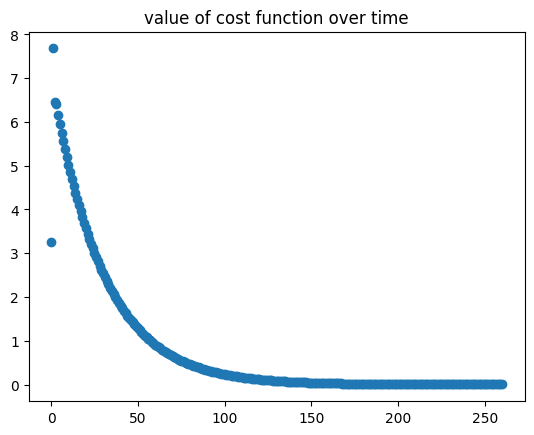

In [10]:
a,b = gradient_descent(a,b,lr,X,Y,n,max_steps,cost_func=mse,grad_decr=grad_decr_least_squares)

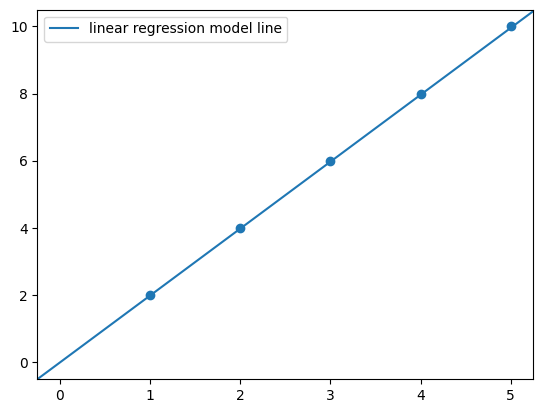

In [11]:
fig,ax  = plt.subplots()
ax.scatter(X,Y)
ax.axline((0,b),slope=a,color='C0',label='linear regression model line')

ax.legend()

plt.show()

In [12]:
def r_squared(x:np.array,y:np.array,n:int,a:float,b:float):
    y_mean = np.sum(y)/n
    rss = np.sum((y-(a*x+b))**2)
    tss = np.sum((y-y_mean)**2)

    return 1 - rss/tss